In [62]:
#####################################
# Colin Chen, Bryan Hiew, Jesse Wu  
# CMSC320 Final Tutorial 
#
#

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

#Taken from Kaggle
data = pd.read_csv('weatherHistory.csv')

In [63]:
#We removed the columns that we deemed were unnecessary for measuring when it
#snow/rain (Expand on this)
columns = [
'Summary',
'Daily Summary',
'Loud Cover',
'Wind Bearing (degrees)',
'Visibility (km)',
'Wind Speed (km/h)',
'Apparent Temperature (C)'
]

#Dropped unncessary columns. Don't run again or it will fail 
data = data.drop(columns=columns)

In [64]:
#Remove 'other' precipitation type
data = data.loc[data['Precip Type'].isin(['rain','snow'])]

#Data cleaning:
#Remove the unnecessary parts of the formatted date
date_col = []
for index, row in data.iterrows():
    date_string = row['Formatted Date']
    split_date = date_string.split(' ')
    date_col.append(split_date[0])
data['Formatted Date'] = date_col
data = data.rename({'Formatted Date':'Date'},axis='columns')

#Average the temperature and humidity per day so that there isn't 9 billion
#different rows. Previously, the dataset was composed of approximately 95,000
#with 11% of them being 'snow'. After tidying it has been reduced to 4,000 with
#441 of them being 'snow', maintaining the overall percentage of the dataset
#Me big brain
precip_dict = {'rain':1, 'snow':2}

#Average variables for all data
curr_date = data['Date'][0]
avg_temp = 0
avg_humidity = 0
avg_precip = 0
avg_pressure = 0
date_count = 0

#Arrays for all day
date_col = []
temp_col = []
humid_col = []
pressure_col = []
precip_col = []

for index, row in data.iterrows():
    #If the date is the same add to average
    if row['Date'] == curr_date:
        avg_temp += row['Temperature (C)']
        avg_humidity += row['Humidity']
        avg_precip += precip_dict[row['Precip Type']]
        avg_pressure += row['Pressure (millibars)']
        date_count += 1
    #Once the date changes, average and add to the lists
    else:
        date_col.append(curr_date)
        temp_col.append(avg_temp/date_count)
        pressure_col.append(avg_pressure/date_count)
        humid_col.append(avg_humidity/date_count)
        #If the avg_precip is <=1.5 we considered it "rain" else it's "snow"
        if (avg_precip/date_count) <= 1.5:
            precip_col.append('rain')
        else:
            precip_col.append('snow')

        curr_date = row['Date']

        avg_temp = row['Temperature (C)']
        avg_humidity = row['Humidity']
        avg_precip = precip_dict[row['Precip Type']]
        avg_pressure = row['Pressure (millibars)']
        date_count = 0

cleaned_data = {
'Date': date_col,
'Precipitation Type': precip_col,
'Humidity': humid_col,
'Temperature (C)': temp_col,
'Pressure (millibars)': pressure_col
}

data = pd.DataFrame(data=cleaned_data)

print(data)

            Date Precipitation Type  Humidity  Temperature (C)  \
0     2006-04-01               rain  0.726667        12.626852   
1     2006-04-10               rain  0.626087        14.798068   
2     2006-04-11               rain  0.868261        12.912560   
3     2006-04-12               rain  0.840000         8.734541   
4     2006-04-13               rain  0.768261         7.845169   
5     2006-04-14               rain  0.756957        11.322222   
6     2006-04-15               rain  0.700870        13.148309   
7     2006-04-16               rain  0.718261        14.949517   
8     2006-04-17               rain  0.761739        14.245411   
9     2006-04-18               rain  0.775217        14.355072   
10    2006-04-19               rain  0.843478        14.773430   
11    2006-04-02               rain  0.780870        13.034300   
12    2006-04-20               rain  0.965217        13.017874   
13    2006-04-21               rain  0.927391        13.982126   
14    2006

Text(0.5,1,'Temperature over time')

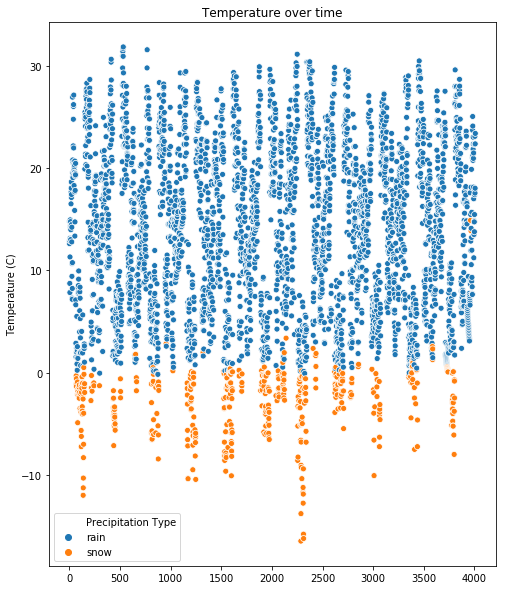

In [34]:
plt.figure(figsize=(8,10,))
temp_plt = sns.scatterplot(x=range(data.shape[0]), y='Temperature (C)', hue='Precipitation Type', data=data)
plt.title('Temperature over time')

Text(0.5,1,'Humidity over time')

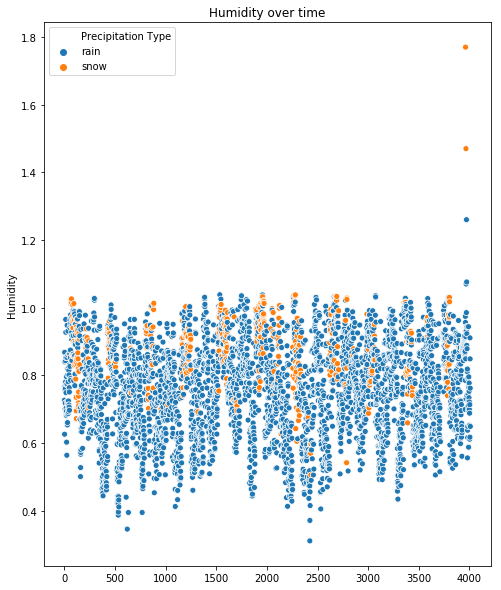

In [44]:
plt.figure(figsize=(8,10,))
humid_plt = sns.scatterplot(x=range(data.shape[0]), y='Humidity', hue='Precipitation Type', data=data)
plt.title('Humidity over time')

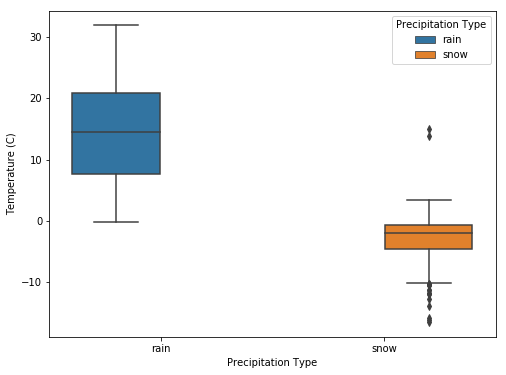

In [46]:
plt.figure(figsize=(8,6,))
temp_boxplot = sns.boxplot(x='Precipitation Type', y='Temperature (C)', hue='Precipitation Type', data=data)

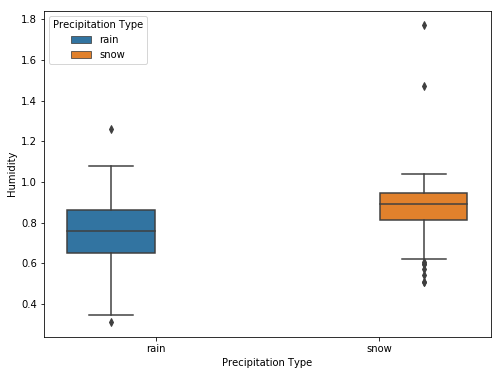

In [37]:
plt.figure(figsize=(8,6,))
temp_boxplot = sns.boxplot(x='Precipitation Type', y='Humidity', hue='Precipitation Type', data=data)

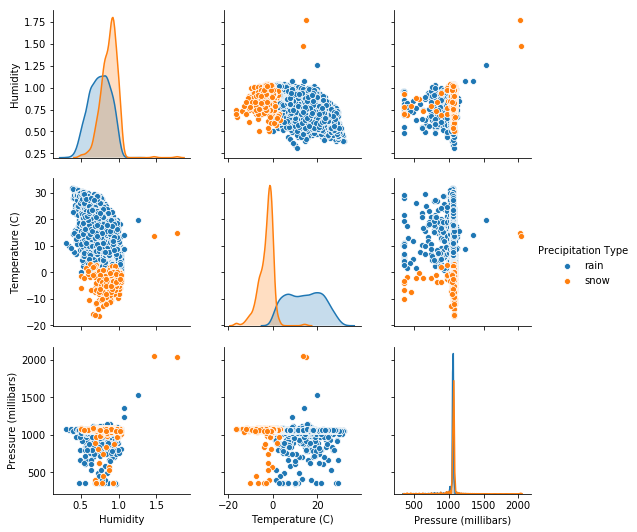

In [49]:
sns.pairplot(data=data, hue='Precipitation Type')

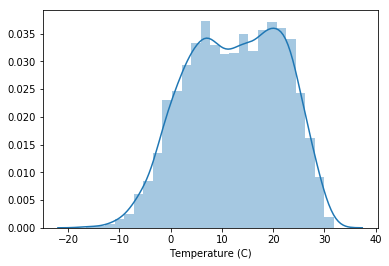

In [56]:
sns.distplot(data['Temperature (C)'])

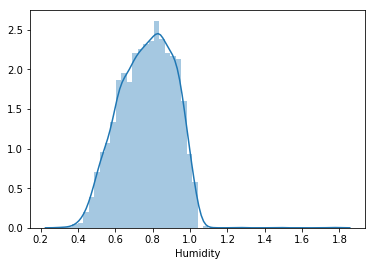

In [57]:
sns.distplot(data['Humidity'])

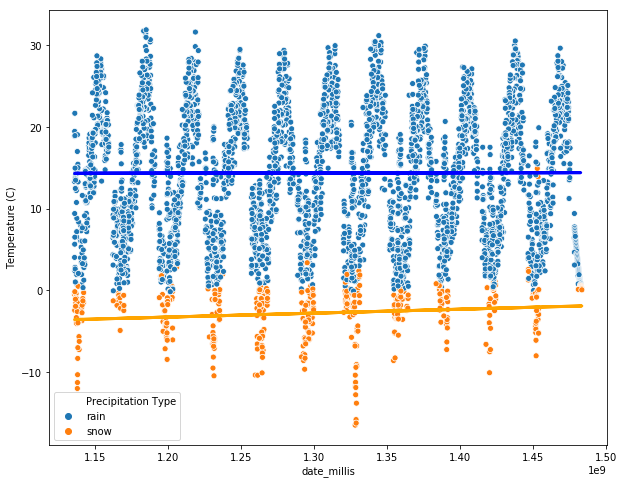

In [66]:
#create a column that represents the date in milliseconds
date_millis=[]
for index, row in data.iterrows():
    split = row['Date'].split('-')
    split[1]= split[1].replace("0","")
    split[2]= split[2].replace("0","")
    rejoin = split[1]+'/'+split[2]+'/'+(split[0])[2:]
    objDate = datetime.strptime(rejoin, '%m/%d/%y')
    date_millis.append(objDate.timestamp())
data['date_millis']=date_millis

#Create Linear Regression
plt.figure(figsize=(10,8,))
sns.scatterplot(x='date_millis', y='Temperature (C)', hue='Precipitation Type', data=data)
for p_type, df in data.groupby('Precipitation Type'):
    sub_X = [[x] for x in df['date_millis'].values]
    sub_Xvals = [[x] for x in df['Temperature (C)'].values]
    sub_lm= LinearRegression().fit(sub_X,sub_Xvals)
    prediction = sub_lm.predict(sub_X)
    if(p_type=='snow'):
        plt.plot(sub_X, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='rain'):
        plt.plot(sub_X, prediction, linewidth=3,color = 'blue', label = p_type)
plt.show()